# [Preprocessing]

*KU LeeDongGyu*

### Install Packages

In [ ]:
pip install opencv-python # cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


### Module

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks/Paper

/content/drive/My Drive/Colab Notebooks/Paper


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 # pip install opencv-python
import os
import sys
import matplotlib.pyplot as plt
import copy
from imp import reload
from PIL import Image #pip install image
import glob

## 1. Data Import
---

In [4]:
train= glob.glob(os.path.join(os.getcwd(),'CALTECH/No_GAN/data/train/*/*')) #24510
valid=glob.glob(os.path.join(os.getcwd(),'CALTECH/No_GAN/data/valid/*/*')) #2980
test=glob.glob(os.path.join(os.getcwd(),'CALTECH/No_GAN/data/test/*/*')) # 3118

In [5]:
print(len(train))
print(len(valid))
print(len(test)) # 3375

24510
2980
3118


In [ ]:
###########################
mit_classes = os.listdir(os.path.join(os.getcwd(),'CALTECH/No_GAN/data/test'))
names = {}
for i,mit_class in enumerate(mit_classes):
    names[i] = mit_class

In [ ]:
new_dict = {}
for i,j in zip(names.keys(),names.values()):
    new_dict[j] = i 

##
# 위는 아래와 같음.
# new_dict = {}
# for i,j in names.items():
#     new_dict[j] = i 
##

###########################

In [ ]:
###########################
# data save는 생략하였음. #
###########################
#x_train = [] # 쓸데없이 오래걸리니 생략
y_train = []
for path in train:
    #img=img_to_array(load_img(path))
    #x_train.append(img) # 쓸데없이 오래걸리니 생략
    
    label = path.split('/')[-2]
    label_num = new_dict[label]
    y_train.append(label_num)

In [ ]:
###########################
# data save는 생략하였음. #
###########################
#x_valid = [] # 쓸데없이 오래걸리니 생략
y_valid = []
for path in valid:
    #img=img_to_array(load_img(path))
    #x_valid.append(img) # 쓸데없이 오래걸리니 생략

    label = path.split('/')[-2]
    label_num = new_dict[label]
    y_valid.append(label_num)

In [ ]:
###########################
# data save는 생략하였음. #
###########################
#x_test = [] # 쓸데없이 오래걸리니 생략
y_test = []
for path in test:
    #img=img_to_array(load_img(path)) 
    #x_test.append(img) # 쓸데없이 오래걸리니 생략

    label = path.split('/')[-2]
    label_num = new_dict[label]
    y_test.append(label_num)

In [ ]:
### 도표를 그리기 위한 밑작업

In [ ]:
y_train_label = []
for path in train:
    label = path.split('/')[-2]
    y_train_label.append(label)

# the number of images per each class
y_train_count = {}
for word in y_train_label:
    if word not in y_train_count:
        y_train_count[word]=1
    else:
        y_train_count[word]+=1

In [ ]:
y_valid_label = []
for path in valid:
    label = path.split('/')[-2]
    y_valid_label.append(label)

# the number of images per each class
y_valid_count = {}
for word in y_valid_label:
    if word not in y_valid_count:
        y_valid_count[word]=1
    else:
        y_valid_count[word]+=1

In [ ]:
y_test_label = []
for path in test:
    label = path.split('/')[-2]
    y_test_label.append(label)

# the number of images per each class
y_test_count = {}
for word in y_test_label:
    if word not in y_test_count:
        y_test_count[word]=1
    else:
        y_test_count[word]+=1

## 2. Data Summary
---

In [ ]:
## 2.1 the number of labels

y_train = np.array(y_train).reshape(-1,1)
y_valid = np.array(y_valid).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
y_total = np.vstack([y_train,y_valid,y_test])

In [ ]:
### 2.2.1 total
y_total = y_total.flatten()
count_total = pd.value_counts(y_total, sort=True)
count_total = count_total.rename(index=names)
print(count_total) ; print("\nTotal:",sum(count_total))

kitchen           734
livingroom        706
bedroom           662
airport_inside    608
bar               604
                 ... 
inside_bus        102
greenhouse        101
lobby             101
hospitalroom      101
elevator          101
Length: 67, dtype: int64

Total: 15620


In [ ]:
index = np.arange(len(names))

In [ ]:
count_total.index

Index(['kitchen', 'livingroom', 'bedroom', 'airport_inside', 'bar', 'subway',
       'casino', 'restaurant', 'warehouse', 'inside_subway', 'bakery',
       'pantry', 'bookstore', 'toystore', 'corridor', 'laundromat',
       'dining_room', 'winecellar', 'deli', 'locker_room', 'hairsalon',
       'meeting_room', 'gym', 'grocerystore', 'bowling', 'bathroom',
       'church_inside', 'mall', 'auditorium', 'movietheater', 'poolinside',
       'museum', 'tv_studio', 'jewelleryshop', 'stairscase', 'trainstation',
       'waitingroom', 'nursery', 'artstudio', 'operating_room', 'closet',
       'dentaloffice', 'gameroom', 'kindergarden', 'laboratorywet', 'cloister',
       'shoeshop', 'fastfood_restaurant', 'computerroom', 'classroom',
       'children_room', 'buffet', 'videostore', 'office', 'studiomusic',
       'restaurant_kitchen', 'library', 'clothingstore', 'prisoncell',
       'florist', 'garage', 'concert_hall', 'inside_bus', 'greenhouse',
       'lobby', 'hospitalroom', 'elevator'],
   

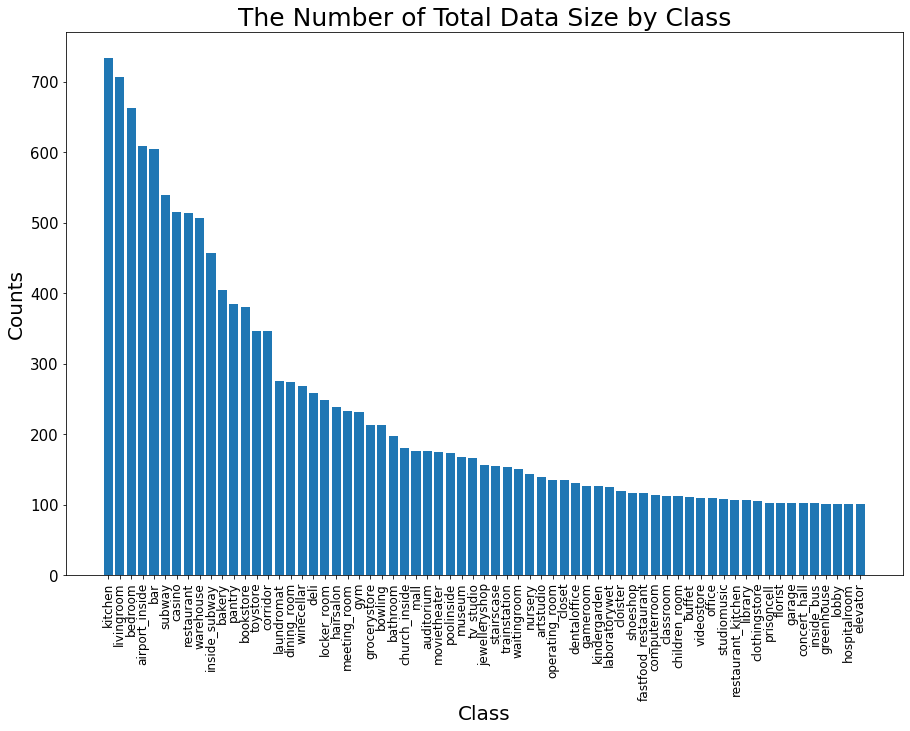

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(index, count_total)
plt.title('The Number of Total Data Size by Class', fontsize=25)
plt.xlabel('Class', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(index, count_total.index, fontsize=12,rotation=90)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
### 2.2.2 train

count_train = pd.value_counts(y_train.flatten(), sort=True)
count_train = count_train.rename(index=names)
print(count_train) ; print("\nTrain:",sum(count_train))

kitchen           571
livingroom        544
bedroom           509
airport_inside    487
bar               472
                 ... 
clothingstore      80
greenhouse         80
elevator           78
inside_bus         76
hospitalroom       74
Length: 67, dtype: int64

Train: 12466


## 3. Data Handling
---

In [ ]:
# -*-coding: UTF-8 -*-
image_buffer =data['pixels']
images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in image_buffer])

X_train = images[list(data['Usage']=='Training'),:].reshape(28709,48,48)
X_private_test = images[list(data['Usage']=='PrivateTest'),:].reshape(3589,48,48)
X_public_test = images[list(data['Usage']=='PublicTest'),:].reshape(3589,48,48)

print("the number of black pictures in training data :", sum(images[list(data['Usage']=='Training'),:].sum(axis=1) == 0) ) 
print("the number of black pictures in private test data :", sum(images[list(data['Usage']=='PrivateTest'),:].sum(axis=1) == 0 ) )
print('the number of black pictures in public test data :', sum(images[list(data['Usage']=='PublicTest'),:].sum(axis=1) == 0 ) ) 


the number of black pictures in training data : 11
the number of black pictures in private test data : 0
the number of black pictures in public test data : 1


In [ ]:
# finally, you can check the real dataset you will use below.
data = data.drop(np.where(images.sum(axis=1)==0 )[0])
y = data['emotion']
X = np.delete(images, np.where(images.sum(axis=1)==0 )[0] , axis=0 ).reshape(-1,48,48)

In [ ]:
ex =X.reshape(-1,48,48,1)

In [ ]:
ch_1 = copy.deepcopy(ex)
ch_2 = copy.deepcopy(ex)

In [ ]:
temp = np.append(ex,ch_1,axis=3)
X = np.append(temp,ch_2,axis=3)

In [ ]:
X.shape

(35875, 48, 48, 3)

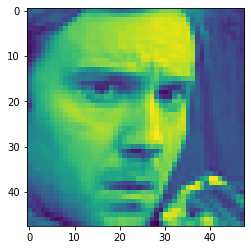

In [ ]:
plt.imshow(images[0].reshape(48,48)) # rgb depth가 1일 때 

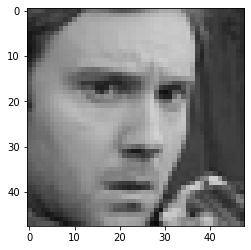

In [ ]:
plt.imshow(X[0]) # rgb depth가 3일 때

In [ ]:
X_train = X[list(data['Usage']=='Training'),:]
X_private_test = X[list(data['Usage']=='PrivateTest'),:]
X_public_test = X[list(data['Usage']=='PublicTest'),:]

y_train = y[list(data['Usage']=='Training')]
y_private_test = y[list(data['Usage']=='PrivateTest')]
y_public_test = y[list(data['Usage']=='PublicTest')]

In [ ]:
print("X_train.shape:",X_train.shape) 
print("X_private_test.shape:",X_private_test.shape)
print("X_public_test.shape:",X_public_test.shape)

X_train.shape: (28698, 48, 48, 3)
X_private_test.shape: (3589, 48, 48, 3)
X_public_test.shape: (3588, 48, 48, 3)
